In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

# sklearn digits dataset

Images are 8x8 pixels.

## Load data

In [3]:
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()
print( dir(digits) )

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


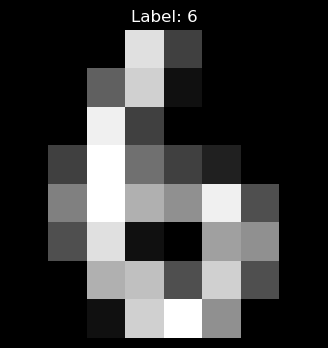

In [14]:
# Pick a random index
idx = np.random.randint(0, len(digits.images))

# Display the image
plt.figure(figsize=(4, 4))
plt.imshow(digits.images[idx], cmap='gray')
plt.title(f"Label: {digits.target[idx]}")
plt.axis('off')
plt.show()

## Create/train/analyze model

In [15]:
X = digits.data
y = digits.target

print(X.shape)

(1797, 64)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y
)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

dropout_rate = 0.1

n_features = X.shape[1]
n_classes  = np.unique(y).shape[0]

# Create model
model = Sequential([
    Input(shape=(n_features,)),
    
    Dense(32, activation='relu'),
    #BatchNormalization(),
    Dropout(dropout_rate),
    
    Dense(16, activation='relu'),
    #BatchNormalization(),
    Dropout(dropout_rate),
    
    Dense(8, activation='relu'),
    
    Dense(n_classes, activation='softmax'),
])

# Define the optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.01)

# Compile model
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=25,          # Stop after 5 epochs without improvement
    restore_best_weights=True  # Restore the best weights after stopping
)

# Display model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │              90 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,834 (11.07 KB)

 Trainable params: 2,834 (11.07 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    shuffle=True,
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1269 - loss: 3.1466 - val_accuracy: 0.1000 - val_loss: 2.2957
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1387 - loss: 2.2152 - val_accuracy: 0.2528 - val_loss: 2.0488
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2457 - loss: 2.0633 - val_accuracy: 0.2833 - val_loss: 1.8837
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2836 - loss: 1.9057 - val_accuracy: 0.3278 - val_loss: 1.7881
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3364 - loss: 1.7352 - val_accuracy: 0.4556 - val_loss: 1.3921
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4813 - loss: 1.4690 - val_accuracy: 0.5944 - val_loss: 1.1395
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5491 - loss: 1.2287 - val_accuracy: 0.6917 - val_loss: 0.8477
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6530 - loss: 0.9356 - val_accuracy: 0.7222 - v

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


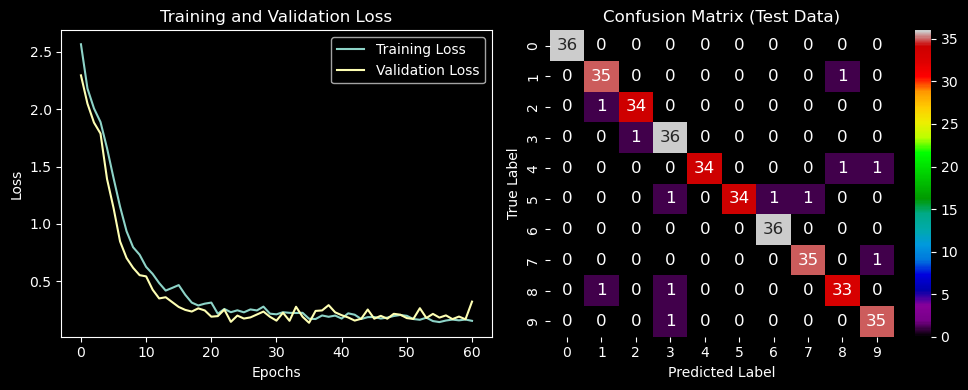

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      0.97      0.96        36
           2       0.97      0.97      0.97        35
           3       0.92      0.97      0.95        37
           4       1.00      0.94      0.97        36
           5       1.00      0.92      0.96        37
           6       0.97      1.00      0.99        36
           7       0.97      0.97      0.97        36
           8       0.94      0.94      0.94        35
           9       0.95      0.97      0.96        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [26]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get predictions
y_train_pred = model.predict(X_train).argmax(axis=1)
y_test_pred  = model.predict(X_test).argmax(axis=1)

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Left subplot: Training and Validation Loss
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
#axes[0].set_yscale('log')
axes[0].set_title('Training and Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Right subplot: Confusion Matrix (Test Data) using seaborn heatmap with vmin set to 0
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', ax=axes[1], vmin=0, 
            annot_kws={"size": 12}, cmap='nipy_spectral')
axes[1].set_title('Confusion Matrix (Test Data)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

# Print classification report for test data
report = classification_report(y_test, y_test_pred)
print(report)

# Keras MNIST dataset

Images are 28x28 pixels.

## Load data

In [71]:
from tensorflow.keras.datasets import mnist

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print shapes
print("X_train.shape:", X_train.shape)
print("X_test.shape: ", X_test.shape)

X_train.shape: (60000, 28, 28)
X_test.shape:  (10000, 28, 28)


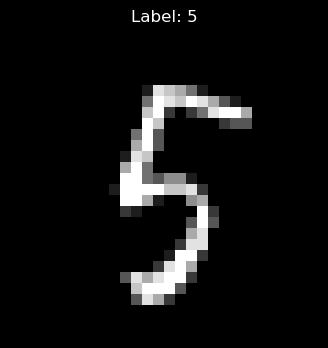

In [72]:
# Display a random image
idx = np.random.randint(0, len(X_train))
plt.figure(figsize=(4, 4))
plt.imshow(X_train[idx], cmap='gray')
plt.title(f"Label: {y_train[idx]}")
plt.axis('off')
plt.show()

## Create/train/analyze model

In [73]:
# flatten images into vectors
X_train_flat = X_train.reshape(X_train.shape[0],-1)
X_test_flat  = X_test.reshape(X_test.shape[0],-1)

print("X_train_flat.shape:", X_train_flat.shape)
print("X_test_flat.shape: ", X_test_flat.shape)

X_train_flat.shape: (60000, 784)
X_test_flat.shape:  (10000, 784)


In [74]:
dropout_rate = 0.1

n_features = X_train_flat.shape[1]
n_classes  = np.unique(y_train).shape[0]

# Create model
model = Sequential([
    Input(shape=(n_features,)),
    
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(dropout_rate),
    
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(dropout_rate),
    
    Dense(8, activation='relu'),
    
    Dense(n_classes, activation='softmax'),
])

# Define the optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.01)

# Compile model
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=25,          # Stop after 5 epochs without improvement
    restore_best_weights=True  # Restore the best weights after stopping
)

# Display model summary
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                     │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 10)                  │              90 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,066 (101.82 KB)

 Trainable params: 25,970 (101.45 KB)

 Non-trainable params: 96 (384.00 B)

In [75]:
history = model.fit(
    X_train_flat, y_train,
    epochs=100,
    batch_size=64,
    shuffle=True,
    validation_data=(X_test_flat, y_test),
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7846 - loss: 0.6862 - val_accuracy: 0.9235 - val_loss: 0.2547
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9142 - loss: 0.2924 - val_accuracy: 0.9453 - val_loss: 0.1837
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9282 - loss: 0.2421 - val_accuracy: 0.9497 - val_loss: 0.1671
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9335 - loss: 0.2220 - val_accuracy: 0.9498 - val_loss: 0.1733
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9399 - loss: 0.2061 - val_accuracy: 0.9527 - val_loss: 0.1620
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9415 - loss: 0.1983 - val_accuracy: 0.9593 - val_loss: 0.1423
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9423 - loss: 0.1950 - val_accuracy: 0.9591 - val_loss: 0.1416
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9440 - loss: 0.1858 - val_accu

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get predictions
y_train_pred = model.predict(X_train_flat).argmax(axis=1)
y_test_pred  = model.predict(X_test_flat).argmax(axis=1)

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Left subplot: Training and Validation Loss
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
#axes[0].set_yscale('log')
axes[0].set_title('Training and Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Right subplot: Confusion Matrix (Test Data) using seaborn heatmap with vmin set to 0
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', ax=axes[1], vmin=0, 
            annot_kws={"size": 12}, cmap='nipy_spectral')
axes[1].set_title('Confusion Matrix (Test Data)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

# Print classification report for test data
report = classification_report(y_test, y_test_pred)
print(report)

## Predict an augmented image

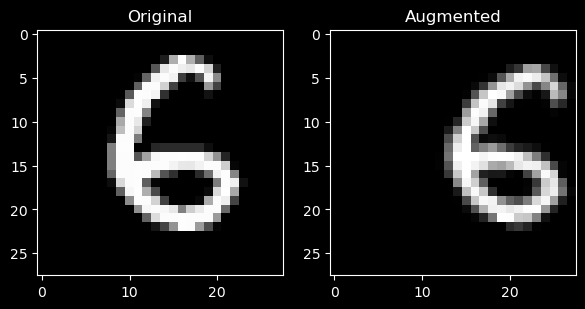

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Original image prediction:  6
Augmented image prediction: 2


In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the image generator with augmentation options
datagen = ImageDataGenerator(
    rotation_range=30,      # Rotate images randomly
    width_shift_range=0.2,  # Randomly shift the width of images
    height_shift_range=0.2, # Randomly shift the height of images
    zoom_range=0.2,         # Randomly zoom
    shear_range=0.1         # Apply shear transformation
)

# Pick a random test image
idx = np.random.randint(0, len(X_test))
image_orig = X_test[idx]

# Create the iterator
iterator = datagen.flow(
    image_orig[np.newaxis, :, :, np.newaxis],
    batch_size=1,
    shuffle=False
)

# Get the augmented image using Python's built-in next()
image_aug = next(iterator)[0, :, :, 0]

# Plot original and augmented image
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.imshow(image_orig, cmap='gray')
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(image_aug, cmap='gray')
plt.title("Augmented")

plt.tight_layout()
plt.show()

# Ensure image shape is (1, 28, 28, 1) and type is float32
image_orig_input = image_orig.flatten()[np.newaxis, :]
image_aug_input  = image_aug.flatten()[np.newaxis, :]

# Predict using the model
pred_orig = model.predict(image_orig_input)
pred_aug = model.predict(image_aug_input)

# Get predicted digit (argmax of class probabilities)
digit_orig = np.argmax(pred_orig)
digit_aug = np.argmax(pred_aug)

print(f"Original image prediction:  {digit_orig}")
print(f"Augmented image prediction: {digit_aug}")

Since only the center pixels ever have ink in them where the letters are drawn, the weights corresponding to the outer pixels don't ever get and information to train on other than 0's. This means that images which are different in scale, translation, or rotation will not be accurately predicted.

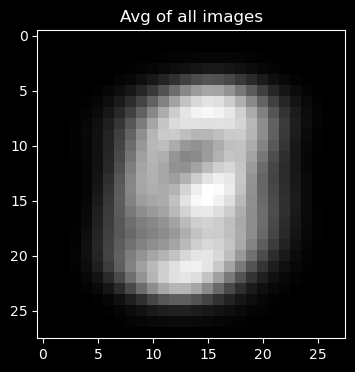

In [77]:
# Display a random image
plt.figure(figsize=(4, 4))
plt.imshow(X_train.mean(axis=0), cmap='gray')
plt.title(f"Avg of all images")
#plt.axis('off')
plt.show()

# Keras MNIST w/ augmented images

## Create augmented dataset

In [63]:
from tensorflow.keras.datasets import mnist

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print shapes
print("X_train.shape:", X_train.shape)
print("X_test.shape: ", X_test.shape)

X_train.shape: (60000, 28, 28)
X_test.shape:  (10000, 28, 28)


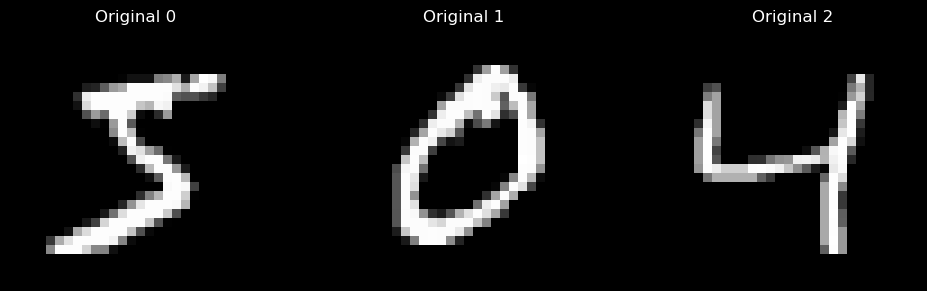

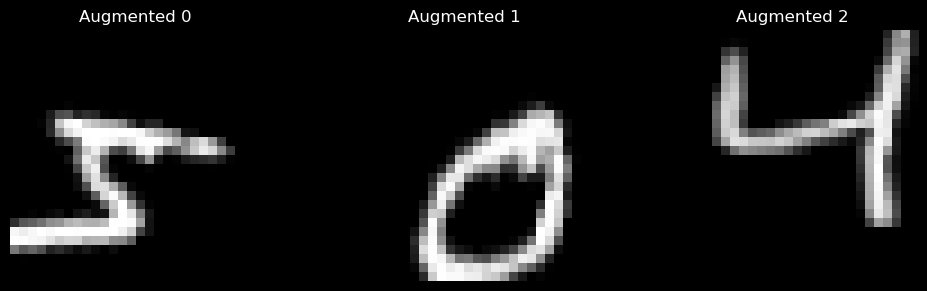

In [64]:
# Define the image generator with augmentation options
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.1
)

# Plot the first 3 images before augmentation
plt.figure(figsize=(10, 3))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Original {i}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Augment X_train
iterator_train = datagen.flow(
    X_train[..., np.newaxis],
    batch_size=X_train.shape[0],
    shuffle=False
)
X_train = next(iterator_train)[..., 0]

# Plot the first 3 images after augmentation
plt.figure(figsize=(10, 3))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Augmented {i}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Augment X_test
iterator_test = datagen.flow(
    X_test[..., np.newaxis],
    batch_size=X_test.shape[0],
    shuffle=False
)
X_test = next(iterator_test)[..., 0]

## Create/train/analyze model

In [65]:
# flatten images into vectors
X_train_flat = X_train.reshape(X_train.shape[0],-1)
X_test_flat  = X_test.reshape(X_test.shape[0],-1)

print("X_train_flat.shape:", X_train_flat.shape)
print("X_test_flat.shape: ", X_test_flat.shape)

X_train_flat.shape: (60000, 784)
X_test_flat.shape:  (10000, 784)


In [66]:
dropout_rate = 0.1

n_features = X_train_flat.shape[1]
n_classes  = np.unique(y_train).shape[0]

# Create model
model = Sequential([
    Input(shape=(n_features,)),
    
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(dropout_rate),
    
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(dropout_rate),
    
    Dense(8, activation='relu'),
    
    Dense(n_classes, activation='softmax'),
])

# Define the optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.01)

# Compile model
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=25,          # Stop after 5 epochs without improvement
    restore_best_weights=True  # Restore the best weights after stopping
)

# Display model summary
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │              90 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,066 (101.82 KB)

 Trainable params: 25,970 (101.45 KB)

 Non-trainable params: 96 (384.00 B)

In [67]:
history = model.fit(
    X_train_flat, y_train,
    epochs=100,
    batch_size=64,
    shuffle=True,
    validation_data=(X_test_flat, y_test),
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3266 - loss: 1.8753 - val_accuracy: 0.5883 - val_loss: 1.1958
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5323 - loss: 1.3565 - val_accuracy: 0.6451 - val_loss: 1.0449
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5669 - loss: 1.2600 - val_accuracy: 0.6514 - val_loss: 1.0259
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5846 - loss: 1.2129 - val_accuracy: 0.6776 - val_loss: 0.9703
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6031 - loss: 1.1636 - val_accuracy: 0.6853 - val_loss: 0.9297
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6095 - loss: 1.1391 - val_accuracy: 0.6913 - val_loss: 0.9268
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6142 - loss: 1.1320 - val_accuracy: 0.7045 - val_loss: 0.8849
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6207 - loss: 1.1104 - val_accu

KeyboardInterrupt: 

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 549us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step


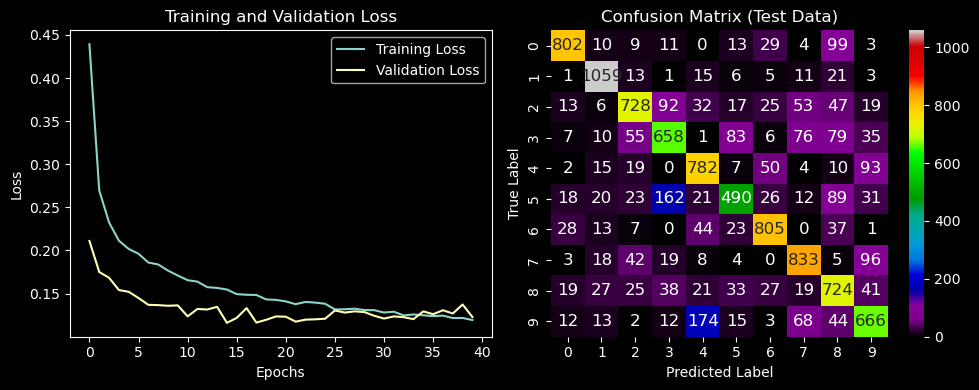

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       980
           1       0.89      0.93      0.91      1135
           2       0.79      0.71      0.74      1032
           3       0.66      0.65      0.66      1010
           4       0.71      0.80      0.75       982
           5       0.71      0.55      0.62       892
           6       0.82      0.84      0.83       958
           7       0.77      0.81      0.79      1028
           8       0.63      0.74      0.68       974
           9       0.67      0.66      0.67      1009

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000



In [68]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get predictions
y_train_pred = model.predict(X_train_flat).argmax(axis=1)
y_test_pred  = model.predict(X_test_flat).argmax(axis=1)

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Left subplot: Training and Validation Loss
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
#axes[0].set_yscale('log')
axes[0].set_title('Training and Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Right subplot: Confusion Matrix (Test Data) using seaborn heatmap with vmin set to 0
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', ax=axes[1], vmin=0, 
            annot_kws={"size": 12}, cmap='nipy_spectral')
axes[1].set_title('Confusion Matrix (Test Data)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

# Print classification report for test data
report = classification_report(y_test, y_test_pred)
print(report)